# Demo for using the Pipeline

### This demo can be used in google colab with a GPU runtime.
You only need to upload this notebook to google colab and start a GPU runtime, then everything that is needed will be cloned and installed.

In [1]:
!git clone https://github.com/JonaRuthardt/SocraticImageGeneration.git

Cloning into 'SocraticImageGeneration'...
remote: Enumerating objects: 738, done.
remote: Counting objects: 100% (167/167), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 738 (delta 79), reused 114 (delta 44), pack-reused 571
Receiving objects: 100% (738/738), 118.60 MiB | 23.43 MiB/s, done.
Resolving deltas: 100% (421/421), done.


In [2]:
%cd SocraticImageGeneration/

/content/SocraticImageGeneration


Instead of using a conda Environment we are installing the necessary libraries from the .yaml file in the colab session.

In [3]:
import os
import yaml

with open("environment.yaml") as file_handle:
    environment_data = yaml.safe_load(file_handle)

for dependency in environment_data["dependencies"]:
    if isinstance(dependency, dict):
      for lib in dependency['pip']:
        os.system(f"pip install {lib}")
!pip install datasets
!pip install accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 16.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 12.6 MB/s eta 0:00:00


In [ ]:
# ask the user for the key
openai_api_key=input("An OpenAI api key is required, please provide the api: ")
with open("config/openai_api_key.txt", "wb") as f:
  f.write(openai_api_key.encode("utf-8", errors="replace"))

Execute the following cell to use the pipeline with your own prompts. For every prompt we present all the imporved prompts and the generated images that were created during the procedure of creating an image that best matches your initial prompt. \\
**Note:** (Running this cell will **delete** all the results that are in the data/results/ directory)

Give a prompt to generate an image: An airport with large jetliners and a bus traveling on a tarmac.
2023-05-28 10:38:08.930663: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loading language model
Loading image generation model
Fetching 13 files: 100% 13/13 [00:00<00:00, 20475.39it/s]
Loading captioning model
100% 50/50 [00:15<00:00,  3.28it/s]
Showing results for Experiment1

Iteration 0

user_prompt  is:  An airport with large jetliners and a bus traveling on a tarmac. 



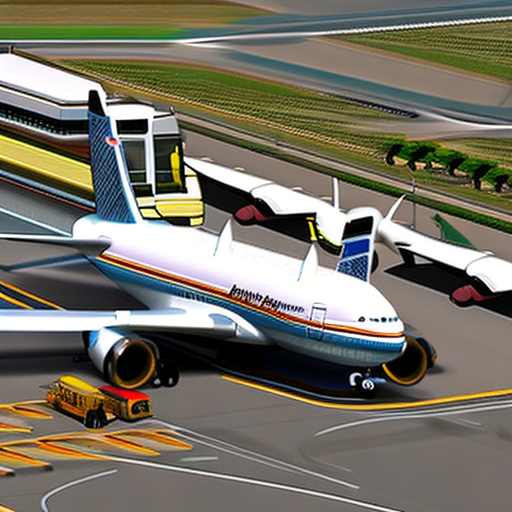


Caption from captioning model is:  there is a large airplane that is sitting on the runway 

Do you want to try a different prompt? (y/n) y
Give a prompt to generate an image: A cup of tea on the head of an elephant.
2023-05-28 10:39:41.550949: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loading language model
Loading image generation model
Fetching 13 files: 100% 13/13 [00:00<00:00, 23401.70it/s]
Loading captioning model
100% 50/50 [00:15<00:00,  3.25it/s]
100% 50/50 [00:11<00:00,  4.22it/s]
100% 50/50 [00:12<00:00,  4.13it/s]
100% 50/50 [00:12<00:00,  4.08it/s]
100% 50/50 [00:11<00:00,  4.19it/s]
100% 50/50 [00:12<00:00,  4.12it/s]
Showing results for Experiment2

Iteration 0

user_prompt  is:  A cup of tea on the head of an elephant. 



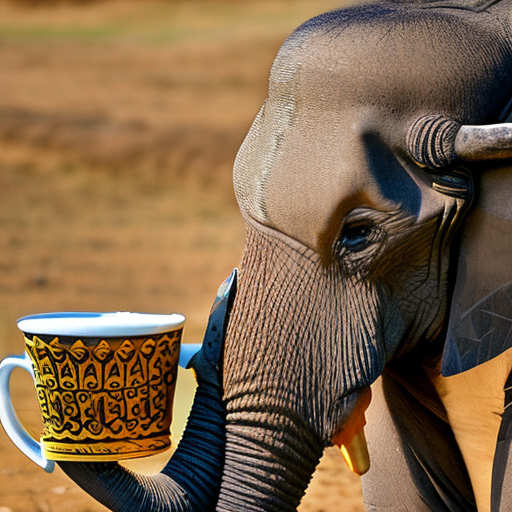


Caption from captioning model is:  there is a elephant that is holding a cup in its trunk 

Iteration 1

optimized_prompt_0  is:  An elephant balancing a teacup on its head. 



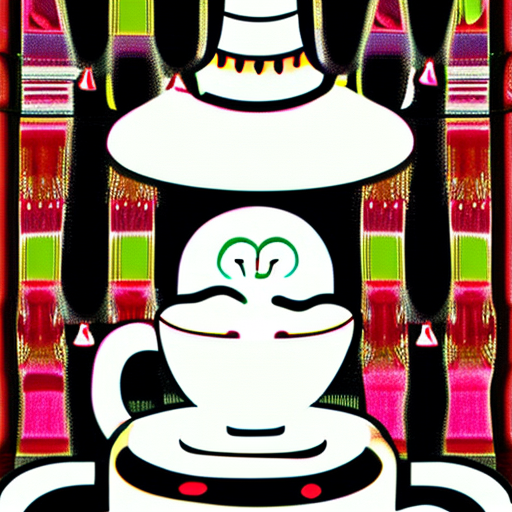


Caption from captioning model is:  there is a painting of a tea cup and saucer on a table 

Iteration 2

optimized_prompt_1  is:  An elephant balancing a teacup on its trunk. 



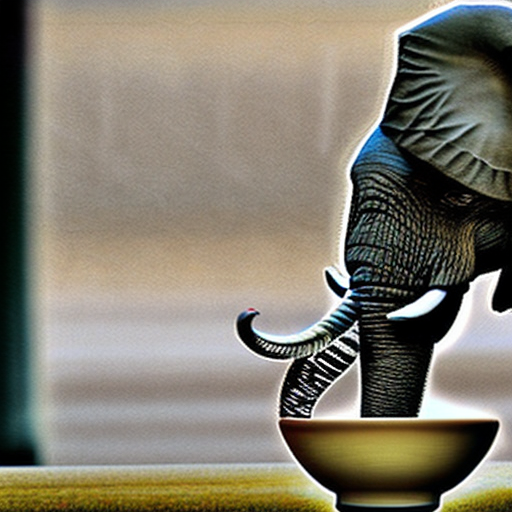


Caption from captioning model is:  there is a statue of an elephant with a bowl in front of it 

Iteration 3

optimized_prompt_2  is:  An elephant balancing a teapot on its head. 



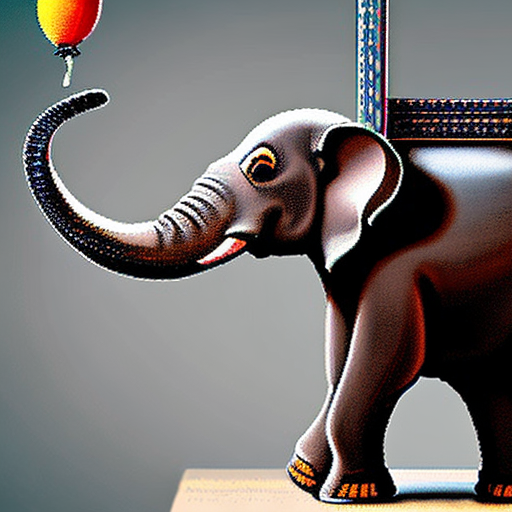


Caption from captioning model is:  painting of an elephant with a balloon in its trunk 

Iteration 4

optimized_prompt_3  is:  An elephant with a teapot balanced on its trunk. 



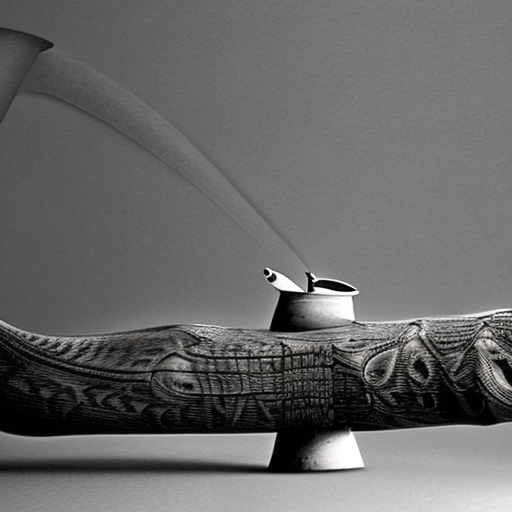


Caption from captioning model is:  there is a vase with a pipe sticking out of it 

Iteration 5

optimized_prompt_4  is:  An elephant drinking tea from a giant cup. 



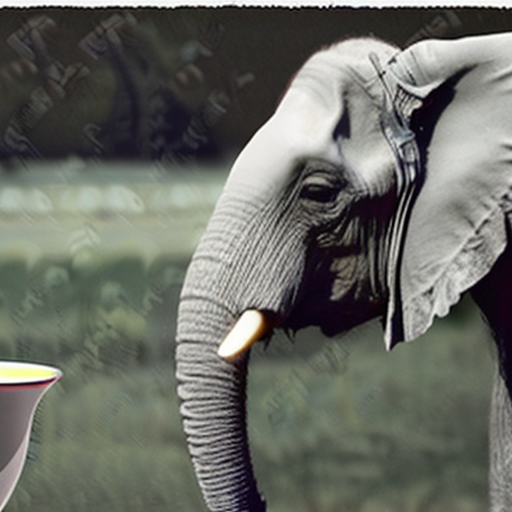


Caption from captioning model is:  there is a elephant that is standing next to a bowl 

Do you want to try a different prompt? (y/n) n


In [37]:
#Demo loop
import pandas as pd
from PIL import Image
from time import sleep

!rm -rf "data/results/"
more= True
experiment_number=0
while more: 
  prompt_to_use = input("Give a prompt to generate an image: ")
  experiment_number+=1
  exp_name = "Experiment"+str(experiment_number)
  !python -m model.run_model "pipeline" "--experiment_name" {exp_name} "dataset" "--prompt" '{prompt_to_use}'
  results_directory = os.path.join("data/results",exp_name,"000000")


  print(f"Showing results for {exp_name}\n")
  prompts= pd.read_table(os.path.join(results_directory, "prompts.csv"),header=None)
  captions= pd.read_table(os.path.join(results_directory, "captions.csv"),header=None)

  for i in range(len(prompts)):
    print(f"Iteration {i}\n" )
    print(prompts.iloc[i][0], " is: ", prompts.iloc[i][1], "\n")
    image_to_show = Image.open(os.path.join(results_directory, f"image_{i}.png"))
    image_to_show.show()
    print( "\nCaption from captioning model is: ", captions.iloc[i][1],"\n")
  sleep(0.5)
  cont = input("Do you want to try a different prompt? (y/n) ")
  if cont != 'y':
    more = False